In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

%matplotlib inline

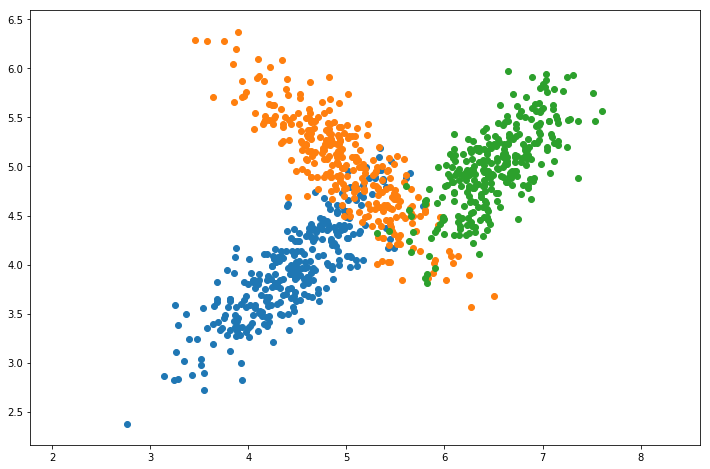

In [8]:
# Generate data from Gaussians
m1 = [4.5, 4.]
c1 = [[0.25, 0.21], [0.21, 0.25]] 

m2 = [5., 5.]
c2 = [[0.25, -0.21], [-0.21, 0.25]]

m3 = [6.5, 5.]
c3 = [[0.16, 0.11], [0.11, 0.16]]

#Total size
N = 300

plt.figure(figsize=[12, 8])
d1 = np.random.multivariate_normal(m1, c1, N)
d2 = np.random.multivariate_normal(m2, c2, N)
d3 = np.random.multivariate_normal(m3, c3, N)
plt.scatter(d1[:, 0], d1[:, 1])
plt.scatter(d2[:, 0], d2[:, 1])
plt.scatter(d3[:, 0], d3[:, 1])
plt.axis('equal')
plt.show()


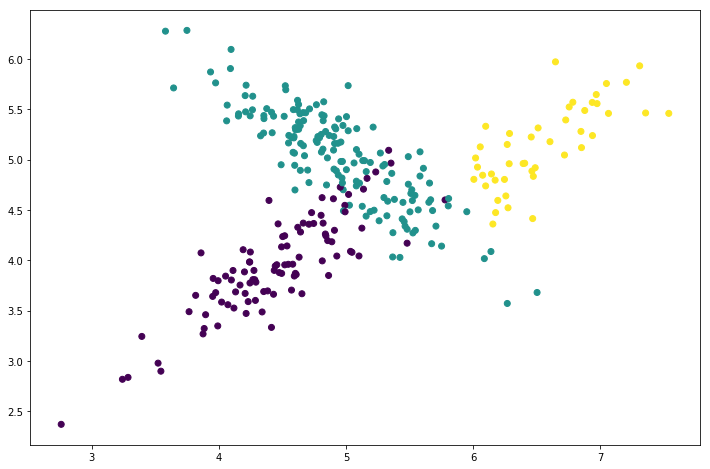

In [16]:
#Mixing probability.
p = 0.4

label = np.random.binomial(2, p, size = N)
c = (d1, d2, d3)
X = np.array([c[label[i]][i] for i in range(N)])
y = label

plt.figure(figsize=[12, 8])
plt.scatter(X[:, 0], X[:, 1], c = label)
plt.show()

## OVA from sklearn.multiclass

In [11]:
model = OneVsRestClassifier(SVC(kernel = 'rbf', C =1))
model.fit(X, y)
predict_lables = model.predict(X)

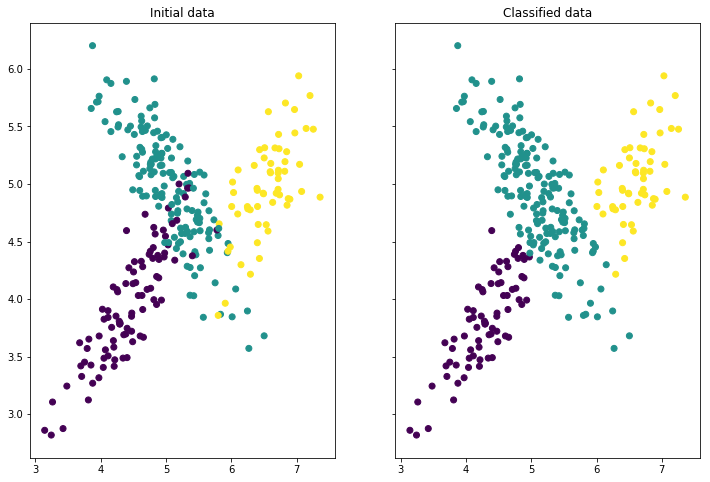

In [14]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=[12, 8])
ax1.scatter(X[:, 0], X[:, 1], c = label)
ax1.set_title('Initial data')
ax2.scatter(X[:, 0], X[:, 1], c = predict_lables)
ax2.set_title('Classified data')
plt.show()

In [15]:
model.estimators_

[SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False),
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)]

In [18]:
print('The score of model: {}'.format(model.score(X, y)))

The score of model: 0.95


## OVA with manualy calculated predictions

In [19]:
# Data preparation
df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y - 1
df['y1'] = (df['y'] == -1).astype(int)
df['y1'] = 2 * df['y1'] - 1
df['y2'] = (df['y'] == 0).astype(int)
df['y2'] = 2 * df['y2'] - 1
df['y3'] = (df['y'] == 1).astype(int)
df['y3'] = 2 * df['y3'] - 1

X = df[['x1','x2']].values
y_1 = df['y1'].values
y_2 = df['y2'].values
y_3 = df['y3'].values

In [23]:
df.head()

,x1,x2,y,y1,y2,y3
0,4.207459,5.636168,0,-1,1,-1
1,6.848502,5.280471,1,-1,-1,1
2,4.419877,5.267178,0,-1,1,-1
3,4.210879,5.474876,0,-1,1,-1
4,4.746452,4.366244,-1,1,-1,-1


In [20]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [21]:
# Fit 3 models
clf_1 = SVC(kernel = 'rbf', C =1, probability=True)
clf_1.fit(X, y_1)

clf_2 = SVC(kernel = 'rbf', C =1, probability=True)
clf_2.fit(X, y_2)

clf_3 = SVC(kernel = 'rbf', C =1, probability=True)
clf_3.fit(X, y_3)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
df['y_predicted'] = ' '
for i in range(len(X)):
    prob_1 = clf_1.predict_proba(np.array(X[i], ndmin=2))[0][1]
    prob_2 = clf_2.predict_proba(np.array(X[i], ndmin=2))[0][1]
    prob_3 = clf_3.predict_proba(np.array(X[i], ndmin=2))[0][1]
    prob_list = np.array([prob_1, prob_2, prob_3])
    if (prob_list.max() == prob_1):
        df.loc.__setitem__((i, 'y_predicted'), -1)
    if (prob_list.max() == prob_2):
        df.loc.__setitem__((i, 'y_predicted'), 0)
    if (prob_list.max() == prob_3):
        df.loc.__setitem__((i, 'y_predicted'), 1)

df.head()

,x1,x2,y,y1,y2,y3,y_predicted
0,4.207459,5.636168,0,-1,1,-1,0
1,6.848502,5.280471,1,-1,-1,1,1
2,4.419877,5.267178,0,-1,1,-1,0
3,4.210879,5.474876,0,-1,1,-1,0
4,4.746452,4.366244,-1,1,-1,-1,-1


In [29]:
df['score'] = (df['y'] == df['y_predicted']).astype(int)
df.head()

,x1,x2,y,y1,y2,y3,y_predicted,score
0,4.207459,5.636168,0,-1,1,-1,0,1
1,6.848502,5.280471,1,-1,-1,1,1,1
2,4.419877,5.267178,0,-1,1,-1,0,1
3,4.210879,5.474876,0,-1,1,-1,0,1
4,4.746452,4.366244,-1,1,-1,-1,-1,1


In [30]:
score = df['score'].sum() / df.shape[0]
print('The score of model: {}'.format(score))

The score of model: 0.9566666666666667


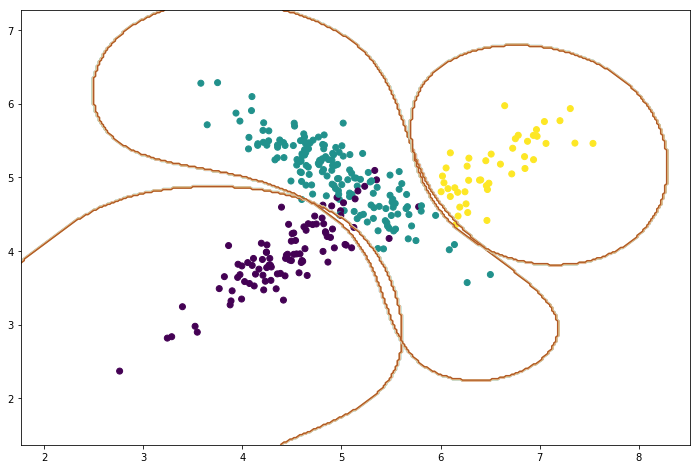

In [31]:
# Visualization of boundaries

xx_1, yy_1 = make_meshgrid(X[:, 0], X[:, 1])
Z_1 = clf_1.predict(np.c_[xx_1.ravel(), yy_1.ravel()])
Z_1 = Z_1.reshape(xx_1.shape)

xx_2, yy_2 = make_meshgrid(X[:, 0], X[:, 1])
Z_2 = clf_2.predict(np.c_[xx_2.ravel(), yy_2.ravel()])
Z_2 = Z_2.reshape(xx_2.shape)

xx_3, yy_3 = make_meshgrid(X[:, 0], X[:, 1])
Z_3 = clf_3.predict(np.c_[xx_3.ravel(), yy_3.ravel()])
Z_3 = Z_3.reshape(xx_3.shape)

plt.figure(figsize=[12, 8])
plt.scatter(X[:, 0], X[:, 1], c = label)
plt.contour(xx_1, yy_1, Z_1, cmap=plt.cm.Paired)
plt.contour(xx_2, yy_2, Z_2, cmap=plt.cm.Paired)
plt.contour(xx_3, yy_3, Z_3, cmap=plt.cm.Paired)
plt.show()